# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования**

Цель данного исследования состоит в том, чтобы установить какие параметры влияют на цену квартир. В качестве входных данных нами будет использован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Описание данных**

Данные представлены следующими категориями:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявленииchildren — количество детей в семье

**План исследования**

1. Предобработка данных.

На данном этапе мы проверим нашу таблицу на наличие пропусков, дубликатов и аномальных значений, скорректируем их и при необходимости добавим в таблицу новые столбцы.

2. Исследование данных.

На данном этапе мы изучим такие факторы, как:

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка. 

Мы ответим на такие вопросы как:

* "Какие продажи можно считать быстрыми, а какие — необычно долгими?"; 
* "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"; 
* "В каких населённых пунктах самая высокой и низкая стоимость квадратного метра?"; 
* "Как стоимость объектов зависит от расстояния до центра города?".

3. Выводы.

На данном этапе мы опишем полученные результаты и зафиксируем итоговый вывод проведённого исследования.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

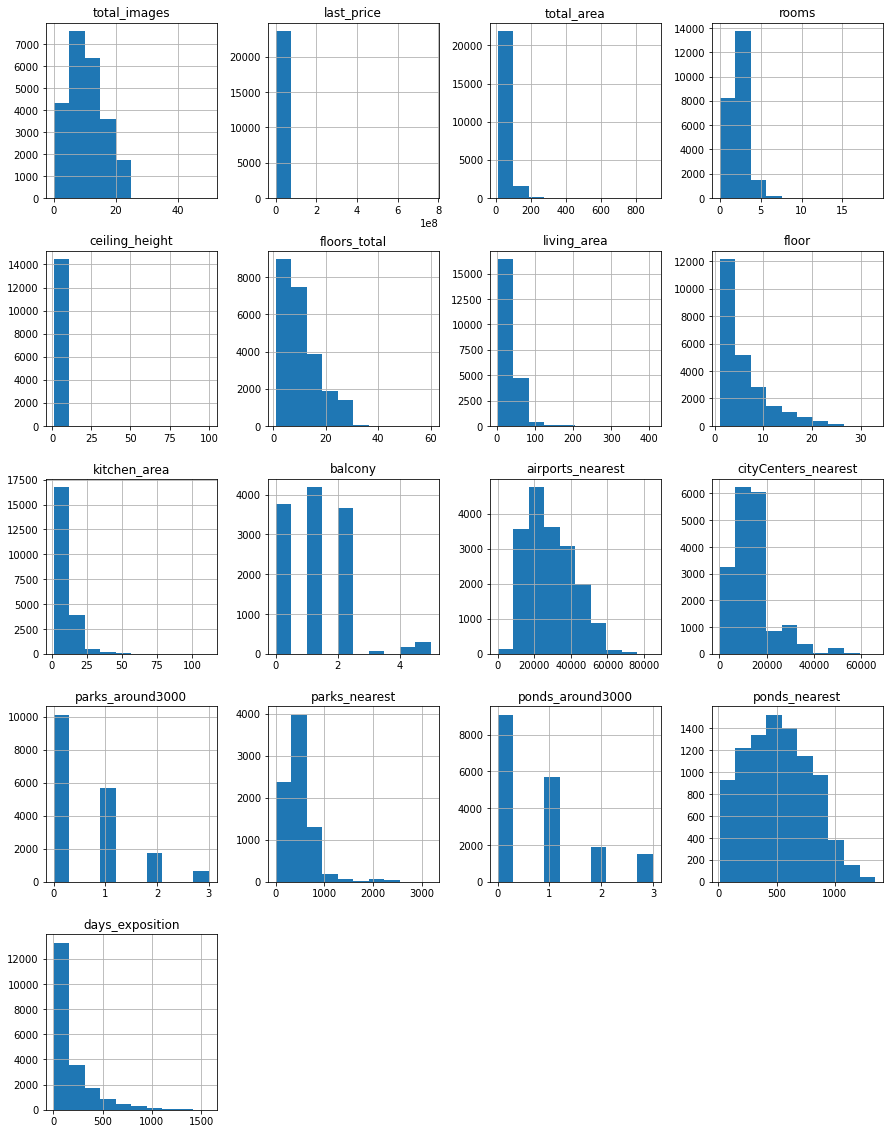

In [3]:
data.hist(figsize=(15, 20))

### Выполните предобработку данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data['locality_name'] = data['locality_name'].fillna('')

**Пропуски в столбце 'locality_name' могли возникнуть либо по какой-либо технической неполадке, либо из-за человеческого фактора - возможно их просто забыли заполнить. Заполним пропуски пустыми строками.** 

In [6]:
data['balcony'] = data['balcony'].fillna(0)

**Пропуски в столбце 'balcony' вероятно связаны с тем, что владельцы квартир без балконов просто пропустили эту графу. Заполним пропуски нулями.** 

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**В столбце 'is_apartment' указывается является ли квартира апартаментами - нежилым пoмeщeнием, имеющим ycлoвия для проживания. Можно предположить, что заполняющие форму для объявления люди либо не были знакомы с данным термином, либо не посчитали нужным его указывать. Будем исходить из того, что большинство продавцов являются владельцами обычных квартир, и заполним пропуски значением False.** 

In [8]:
data['floors_total'] = data['floors_total'].where(~data['floors_total'].isna(), data['floor'])

**Пропуски в столбце 'floors_total' вероятно связаны с тем, что в объявлениях о продаже забыли указать общее число этажей в здании, заполним пропуски значениями из столбца 'floor' - если квартира расположена на 4 этаже, в здании как минимум 4 этажа.** 

**Столбцы 'ceiling_height', 'living_area' и 'kitchen_area' заполняются вручную, соответственно можно предположить, что владельцы квартир, разместившие объявления, либо не обладали необходимыми данными, либо не захотели их указывать. Возможно, в определенных случаях отсутствие данных в столбцах 'living_area' и 'kitchen_area' могло быть связано с особой планировкой продаваемых квартир. 
Столбцы 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' заполняются автоматически на основе картографических данных. Рассмотрим в каких населенных пунктах чаще всего встречаются пропуски в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'.** 

In [9]:
data.loc[data['cityCenters_nearest'].isna(), 'locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

In [10]:
data.loc[data['airports_nearest'].isna(), 'locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

In [11]:
data.loc[data['parks_around3000'].isna(), 'locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

In [12]:
data.loc[data['ponds_around3000'].isna(), 'locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

**Пропуски в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' чаще всего встречаются в строках, относящихся к квартирам, расположенным в области, а не в самом Санкт-Петербурге. Таким образом пропуски можно объяснить несовершенством картографических данных, на основе которых заполнялась таблица. Ожидаемо данные по такому крупному городу как Санкт-Петербург куда полнее. 
Пропуски в столбцах 'parks_nearest' и 'ponds_nearest' также можно объяснить особенностями картографических данных - вероятно данные по квартирам, находящимся на слишком большом удалении от парков и водоемов соответственно, не были должным образом подсчитаны и не попали в таблицу.** 

In [13]:
data['days_exposition'].min()

1.0

**Минимальное значение в столбце 'days_exposition' - 1, возможно часть пропусков возникла из-за того, что часть объявлений была снята менее чем за день, возможно при выгрузке данных возникла иная техническая проблема. Учитывая то, что в столбце с датой публикации пропусков нет, вероятно проблема как-то связана с датой снятия объявления.** 

**Теперь рассмотрим какие в таблице имеются типы данных и нуждаются ли они в корректировке.** 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Количество балконов и этажей это целые числа, поменяем тип данных в этих столбцах на int.** 

In [15]:
data['floors_total'] = data['floors_total'].astype(int)

In [16]:
data['balcony'] = data['balcony'].astype(int)

**В столбце 'first_day_exposition' указаны даты размещения объявлений, изменим тип данных в столбце на datetime.** 

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Проверим внесенные изменения.** 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Приступим к устранению неявных дубликатов в столбце 'locality_name'. Сперва изучим уникальные значения в этом столбце.** 

In [19]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Создадим новый столбец 'fixed_locality_name' и добавим в него данные из столбца 'locality_name', очищенные от дубликатов.** 

In [20]:
# Удалим обозначения типа населенного пункта и оставим только названия
data['fixed_locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 'городской поселок ', 'поселок при железнодорожной станции ', 
              'поселок станции ', 'коттеджный поселок ', 'поселок ', 'деревня ', 'село ', 'садовое товарищество ', 
              'садоводческое некоммерческое товарищество '], '', regex=True)
)              

In [21]:
data['fixed_locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

### Добавьте в таблицу новые столбцы

**Добавим в таблицу новые столбцы со следующими параметрами:**

цена одного квадратного метра ('sq_meter_price');
день недели публикации объявления (weekday_exp);

месяц публикации объявления ('month_exp');

год публикации объявления ('year_exp');

тип этажа квартиры - первый, последний, другой ('floor_type');

расстояние до центра города в километрах ('cityCenters_nearest_km'). 

In [22]:
# Цену квадратного метра округлим до 2-х знаков после запятой
data['sq_meter_price'] = round(data['last_price'] / data['total_area'], 2)

In [23]:
data['weekday_exp'] = data['first_day_exposition'].dt.weekday

In [24]:
data['month_exp'] = data['first_day_exposition'].dt.month

In [25]:
data['year_exp'] = data['first_day_exposition'].dt.year

In [26]:
# Создадим функцию сортирующую этажи по типу (первый, последний, другой)
def floor_type(x, y):
    if x == 1:
        return 'первый'
    elif  x== y:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(lambda row: floor_type(row['floor'], row['floors_total']), axis=1)

In [27]:
# Округлим расстояние до центра города в километрах до целого
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

### Проведите исследовательский анализ данных

#### Изучим параметры

(0.0, 120.0)

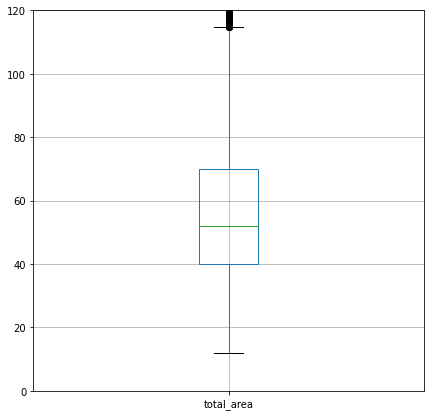

In [28]:
data.boxplot('total_area', figsize=(7, 7))
plt.ylim(0, 120)

In [29]:
data['last_price'].median()

4650000.0

In [30]:
data[data['total_area'] > 200]['last_price'].head(10)

155     96000000.0
464     66571000.0
492     95000000.0
509     90000000.0
521     25717300.0
581     65000000.0
660     49950000.0
681     24900000.0
793    135000000.0
813     16500000.0
Name: last_price, dtype: float64

**Цена на квартиры с большой площадью заметно выше медианной, из чего мы можем сделать вывод, что это не искаженные значения, а реальные квартиры с большой площадью. Удалим выбивающиеся значения и построим гистограмму.** 

Text(0.5, 0, 'Общая площадь объекта, м кв')

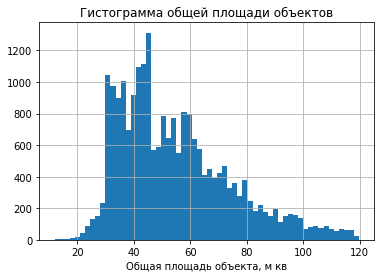

In [98]:
data[data['total_area'] < 120]['total_area'].hist(bins=60)
plt.title('Гистограмма общей площади объектов')
plt.xlabel('Общая площадь объекта, м кв')

(0.0, 80.0)

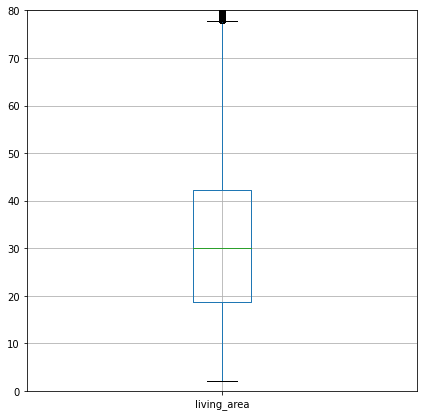

In [32]:
data.boxplot('living_area', figsize=(7, 7))
plt.ylim(0, 80)

Text(0.5, 0, 'Жилая площадь объекта, м кв')

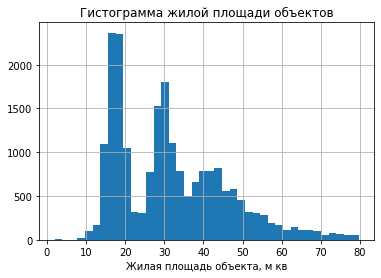

In [97]:
data[data['living_area'] < 80]['living_area'].hist(bins=40)
plt.title('Гистограмма жилой площади объектов')
plt.xlabel('Жилая площадь объекта, м кв')

(0.0, 20.0)

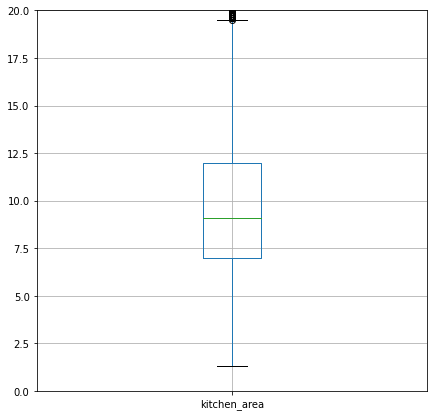

In [34]:
data.boxplot('kitchen_area', figsize=(7, 7))
plt.ylim(0, 20)

Text(0.5, 0, 'Площадь кухни, м кв')

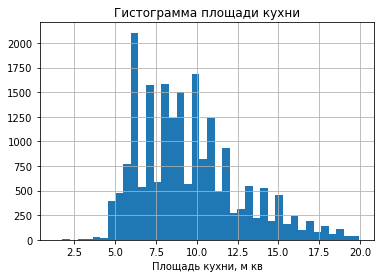

In [84]:
data[data['kitchen_area'] < 20]['kitchen_area'].hist(bins=40)
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни, м кв')

(-1000000.0, 15000000.0)

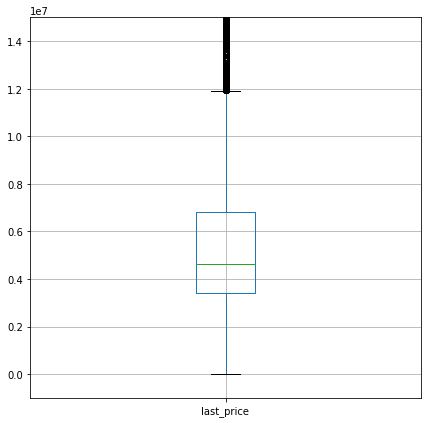

In [36]:
data.boxplot('last_price', figsize=(7,7))
plt.ylim(-1e6, 1.5e7)

In [37]:
# Проверим квартиры со слишком низкой ценой
data[data['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,fixed_locality_name,sq_meter_price,weekday_exp,month_exp,year_exp,floor_type,cityCenters_nearest_km
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0.0,NaN,8.0,Санкт-Петербург,111.83,2,3,2019,последний,9.0


Text(0.5, 0, 'Цена объекта, 10e7 руб.')

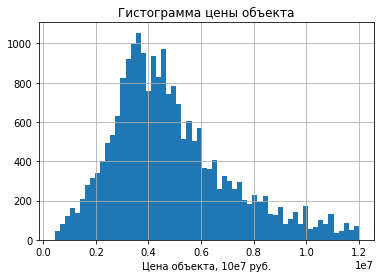

In [89]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7), ['last_price']].hist(bins=60)
plt.title('Гистограмма цены объекта')
plt.xlabel('Цена объекта, 10e7 руб.')

(-1.0, 10.0)

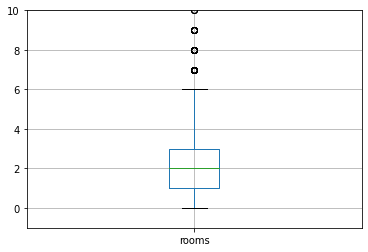

In [39]:
data.boxplot('rooms')
plt.ylim(-1, 10)

In [40]:
# Проверим, что квартиры со значением 'о' в графе 'число комнат' это студии и квартиры с открытой планировкой
data.loc[(data['rooms'] == 0) & (data['studio'] == False) & (data['open_plan'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,fixed_locality_name,sq_meter_price,weekday_exp,month_exp,year_exp,floor_type,cityCenters_nearest_km


Text(0.5, 0, 'Количество комнат, ед.')

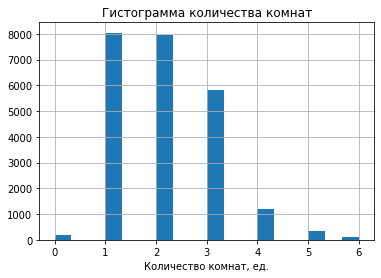

In [90]:
data.loc[data['rooms'] < 7, ['rooms']].hist(bins=18)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат, ед.')

(2.0, 3.5)

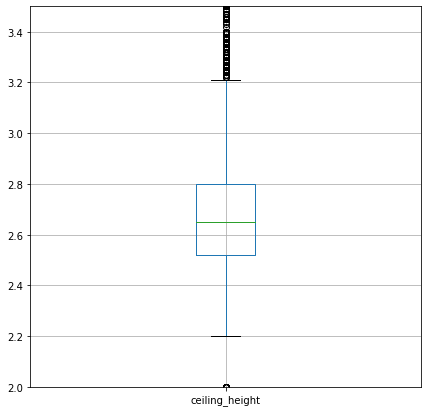

In [42]:
data.boxplot('ceiling_height', figsize=(7, 7))
plt.ylim(2, 3.5)

Text(0.5, 0, 'Высота потолков, м')

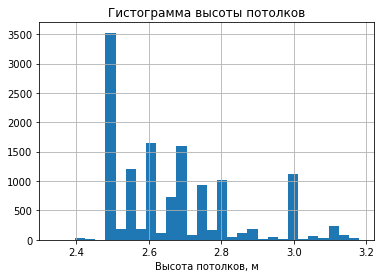

In [91]:
# Потолки высотой в 10, 20 и более метров явно являются аномалией, вызванной ошибкой при заполнени объявления.
# Уменьшим аномальные значения в 10 раз.
data['ceiling_height'].where(data['ceiling_height'] < 10, data['ceiling_height'] / 10).loc[
    (data['ceiling_height'] > 2.3) & (data['ceiling_height'] < 3.2)].hist(bins=30)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')

Text(0.5, 0, 'Тип этажа')

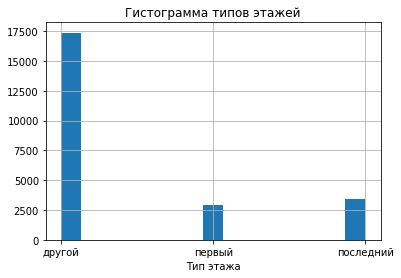

In [93]:
data['floor_type'].hist(bins=15)
plt.title('Гистограмма типов этажей')
plt.xlabel('Тип этажа')

(0.0, 40.0)

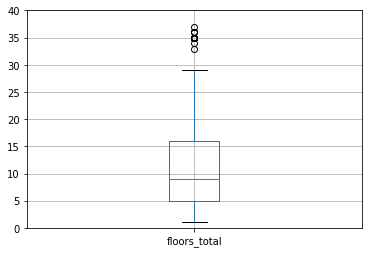

In [45]:
data.boxplot('floors_total')
plt.ylim(0, 40)

Text(0.5, 0, 'Количество этажей в доме, ед.')

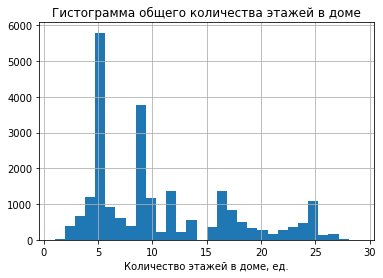

In [94]:
data.loc[data['floors_total'] < 30, ['floors_total']].hist(bins=30)
plt.title('Гистограмма общего количества этажей в доме')
plt.xlabel('Количество этажей в доме, ед.')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Здесь все хорошо с гистограммой </div>

(-1000.0, 30000.0)

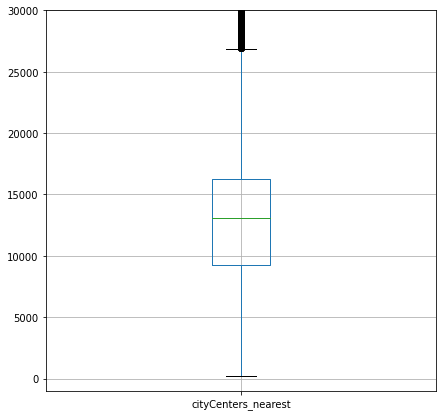

In [47]:
data.boxplot('cityCenters_nearest', figsize=(7,7))
plt.ylim(-1000, 30000)

Text(0.5, 0, 'Расстояние до центра города, м')

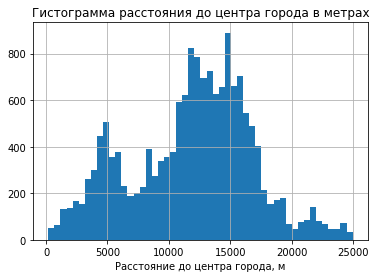

In [99]:
data.loc[data['cityCenters_nearest'] < 25000, ['cityCenters_nearest']].hist(bins=50)
plt.title('Гистограмма расстояния до центра города в метрах')
plt.xlabel('Расстояние до центра города, м')

(-100.0, 1500.0)

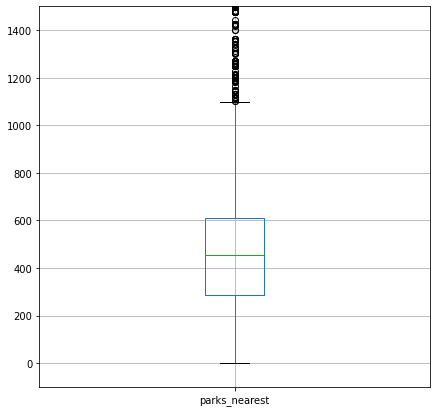

In [49]:
data.boxplot('parks_nearest', figsize=(7,7))
plt.ylim(-100, 1500)

Text(0.5, 0, 'Расстояние до ближайшего парка, м')

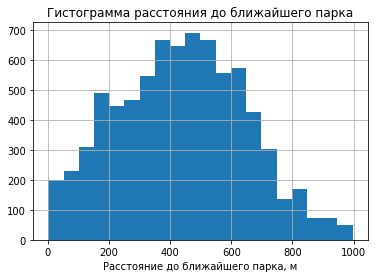

In [100]:
data.loc[data['parks_nearest'] < 1000, ['parks_nearest']].hist(bins=20)
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')

**Общая площадь**

Общая площадь большинства квартир находится в пределах 20-120 квадратных метров. Чаще всего встречаются квартиры с площадью в 30-80 квадратных метров.

**Жилая площадь**

Жилая площадь большинства квартир находится в пределах 10-80 квадратных метров. Чаще всего встречаются квартиры с жилой площадью  в 10-50 квадратных метров.

**Площадь кухни**

Площадь кухни большинства квартир находится в пределах 3-20 квадратных метров. Чаще всего встречаются квартиры с площадью кухни в 5-15 квадратных метров.

**Цена объекта**

Цена большинства квартир находится в пределах от 0,5 до 12 миллионов рублей. Чаще всего встречаются квартиры с ценой от 2 до 6 миллионов рублей.

**Количество комнат**

Большинства квартир имеет от 1 до 4 комнат. Квартиры с 5, 6 и более комнатами являются редкостью.

**Высота потолков**

В основном высота потолков в квартирах находится в пределах от 2,5 до 3 метров. Потолки высотой 2,5-2,7 м встречаются чаще всего.  

**Тип этажа квартиры**

Большинство продаваемых квартир находится не на первом, ни на последнем этаже.

**Общее количество этажей в доме**

Дома в которых больше 25 этажей встречаются крайне редко. Чаще всего встречаются 5-ти и 9-ти этажные дома.  

**Расстояние до центра города в метрах**

Большинство домов, квартиры в которых выставлены на продажу, находятся на расстоянии от 3-х до 18-ти км от центра города. Квартиры в центре и на большем удалении встречаются редко.

**Расстояние до ближайшего парка**

Большинство домов, квартиры в которых выставлены на продажу, находятся либо в непосредственной близости от парка, либо на удалении до 700 метров.  
 


#### Изучим, как быстро продавались квартиры

Text(0.5, 0, 'Количество дней, прошедших с момента публикации объявления')

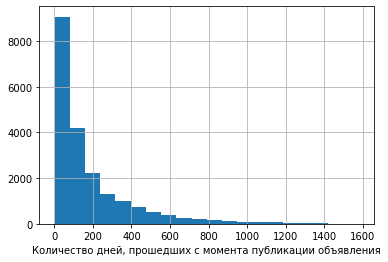

In [114]:
data['days_exposition'].hist(bins=20)
plt.xlabel('Количество дней, прошедших с момента публикации объявления')

In [52]:
data['days_exposition'].mean()

180.88863436982163

In [53]:
data['days_exposition'].median()

95.0

In [54]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

(-10.0, 600.0)

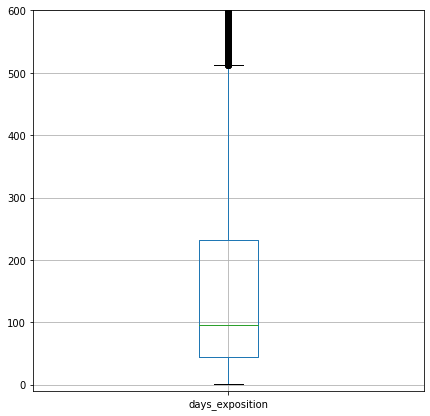

In [55]:
data.boxplot('days_exposition', figsize=(7,7))
plt.ylim(-10, 600)

**Время продажи квартир**

Среднее значение времени продажи квартир - 180 дней, медианное - 95 дней. В основном квартиры продаются примерно за три с половиной месяца - в пределах 100 дней. Быстрыми можно считать продажи квартир за полтора месяца - 45 дней и меньше. Долгими - за семь с половиной месяцев - 232 дня и больше. 

#### Определим факторы, которые больше всего влияют на общую стоимость объекта

Text(0, 0.5, 'Цена')

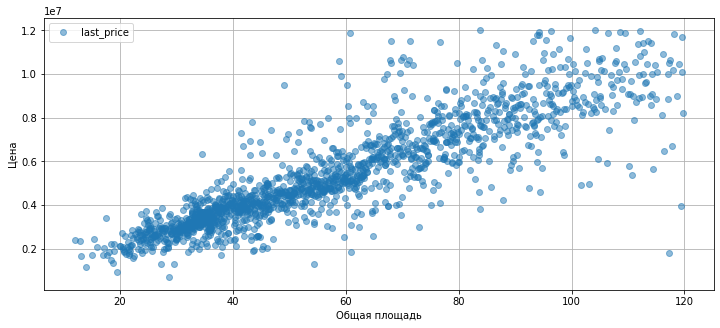

In [115]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7) & (data['total_area'] < 120)].pivot_table(
    index='total_area', values='last_price').plot(style='o', grid=True, figsize=(12, 5), alpha=0.5)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')

In [104]:
data[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7)]['last_price'].corr(data[data['total_area'] < 120]['total_area'])

0.6999468044438131

Text(0, 0.5, 'Цена')

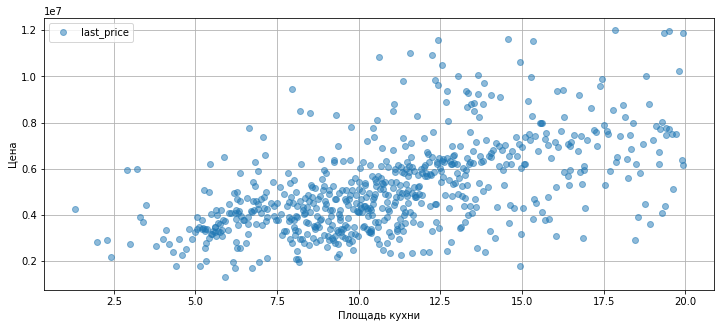

In [116]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7) & (data['kitchen_area'] < 20)].pivot_table(
    index='kitchen_area', values='last_price').plot(style='o', grid=True, figsize=(12, 5), alpha=0.5)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')

In [106]:
data[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7)]['last_price'].corr(
    data[data['kitchen_area'] < 20]['kitchen_area'])

0.48852767215030724

Text(0, 0.5, 'Цена')

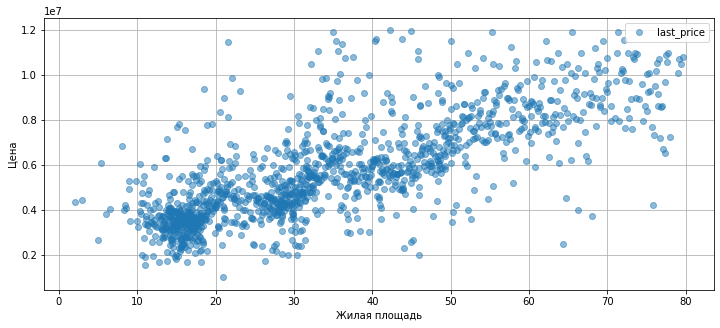

In [117]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7) & (data['living_area'] < 80)].pivot_table(
    index='living_area', values='last_price').plot(style='o', grid=True, figsize=(12, 5), alpha=0.5)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')

In [107]:
data[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7)]['last_price'].corr(
    data[data['living_area'] < 80]['living_area'])

0.5759368216439965

Text(0, 0.5, 'Цена')

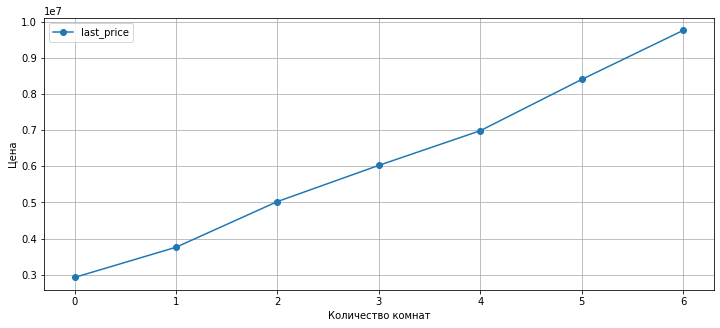

In [118]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7) & (data['rooms'] < 7)].pivot_table(
    index='rooms', values='last_price').plot(style='o-', grid=True, figsize=(12, 5))
plt.xlabel('Количество комнат')
plt.ylabel('Цена')

In [109]:
data[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7)]['last_price'].corr(
    data[data['rooms'] < 7]['rooms'])

0.4554258206704704

Text(0, 0.5, 'Цена')

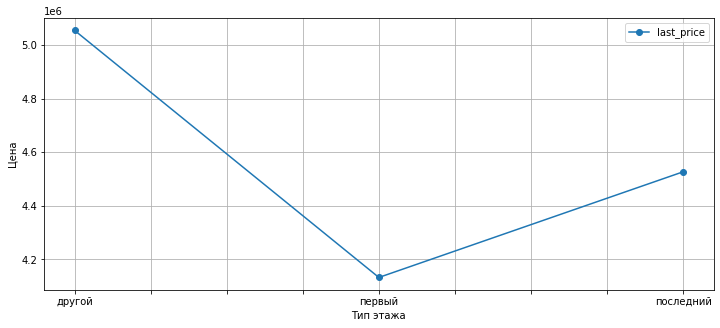

In [119]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7)].pivot_table(
    index='floor_type', values='last_price').plot(style='o-', grid=True, figsize=(12, 5))
plt.xlabel('Тип этажа')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

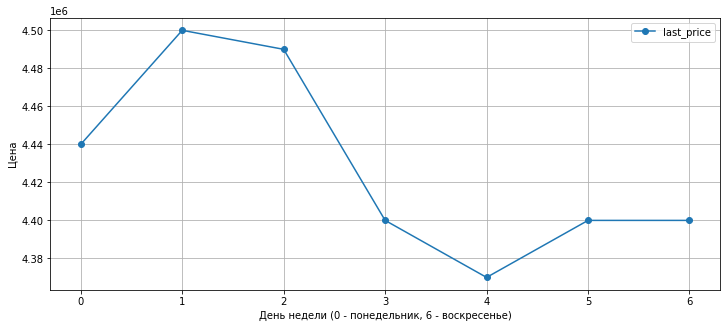

In [120]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7)].pivot_table(
    index='weekday_exp', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(12, 5))
plt.xlabel('День недели (0 - понедельник, 6 - воскресенье)')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

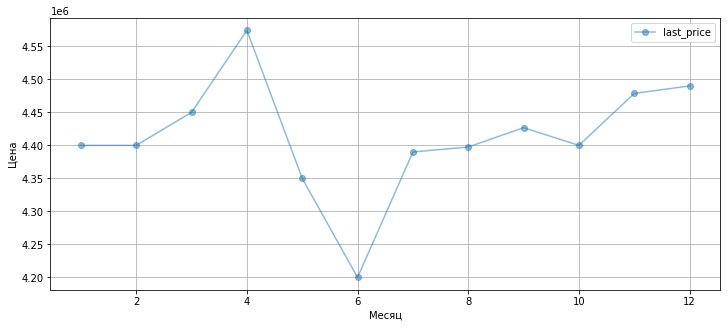

In [121]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7)].pivot_table(
    index='month_exp', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(12, 5), alpha=0.5)
plt.xlabel('Месяц')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

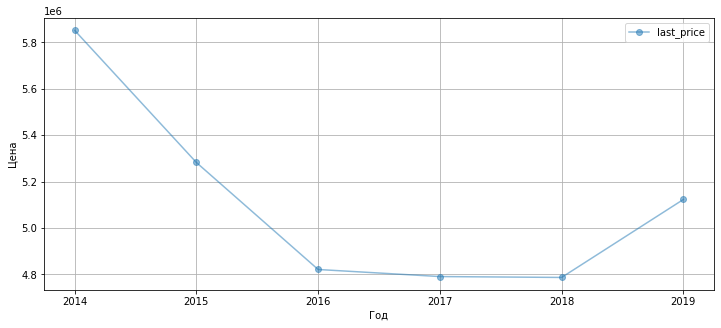

In [122]:
data.loc[(data['last_price'] > 4e5) & (data['last_price'] < 1.2e7)].pivot_table(
    index='year_exp', values='last_price').plot(style='o-', grid=True, figsize=(12, 5), alpha=0.5)
plt.xlabel('Год')
plt.ylabel('Цена')

**Факторы, влияющие на стоимость объекта.**

* Между общая площадью и ценой объекта есть заметная корреляция - чем больше площадь, тем выше цена. 
* Жилая площадь также имеет заметную корреляцию со стоимостью объекта, однако ее влияние слабее, чем общей площади. 
* Влияние площади кухни на стоимость квартиры выражено слабо - присутствует умеренная корреляция. 
* Квартиры с большим числом комнат как правило имеют большую стоимость - присутствует умеренная корреляция. 
* Квартиры на первом этаже имеют меньшую цену, чем квартиры на последнем. Наибольшую цену имеют квартиры, расположенные не на первом, ни на последнем этаже.
* Наибольшую цену имеют квартиры, объявления о продаже которых были опубликованы во вторник, наименьшую - квартиры, выставленные на продажу в пятницу. Однако в целом колебания цен не настолько высоки, чтобы можно было говорить о существовании какой-либо зависимости. 
* Распределение по месяцам опубликования объявлений следующее: самые высокие цены в апреле, самые низкие - в июне. 
* Распределение по годам: с 2014 по 2018 наблюдался спад цен на жилье, в 2019 наблюдался рост цен.   

#### Определим в каких населённых пунктах самая высокой и низкая стоимость квадратного метра.

In [64]:
data.pivot_table(index='fixed_locality_name', values='sq_meter_price',
                 aggfunc=('mean', 'count')).sort_values(by='count', ascending=False).head(10)

,count,mean
fixed_locality_name,,
Санкт-Петербург,15721,114849.008793
Мурино,590,86087.512017
Кудрово,472,95324.930508
Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


**Среди 10 населённых пунктах с наибольшим числом объявлений самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.**

#### Определим, как стоимость объектов зависит от расстояния до центра города.

Text(0, 0.5, 'Цена')

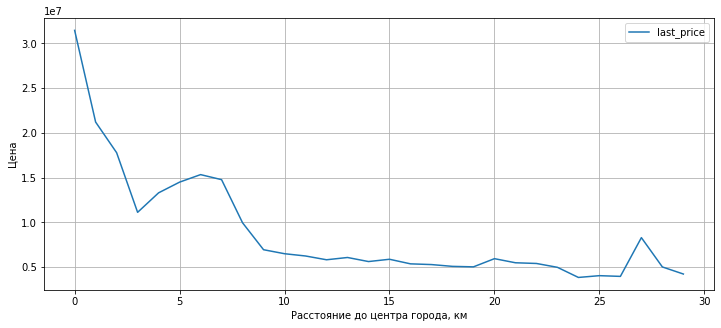

In [123]:
data[data['fixed_locality_name'] == 'Санкт-Петербург'].pivot_table(
    index='cityCenters_nearest_km', values='last_price').plot(grid=True, figsize=(12, 5))
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Цена')

**Ожидаемо цена квартир значительно выше в центре города, на расстоянии от центра города в 10 км и более цена меняется незначительно.**

### Напишите общий вывод

**Площадь**

Один из основных факторов, влияющих на цену квартиры - общая площадь объекта. В определенной мере на стоимость влияет жилая площадь квартиры, площадь кухни влияет на цену слабо.  

**Расположение**

* Расположенные в центре квартиры заметно дороже, на расстояни 9-10 км от центра и дальше стоимость жилья мало зависит от расстояния. 
* По области самые дорогие квартиры в Санкт-Петербурге, самые дешевые - в Выборге.
* Наиболее дешевые квартиры на первом этаже. Последний этаж дороже первого, но дешевле остальных.

**Число комнат в квартире**

Квартиры с большим числом комнат как правило имеют большую стоимость. 

**Время публикации объявления**

* Наибольшую цену имеют квартиры, объявления о продаже которых были опубликованы во вторник, наименьшую - квартиры, выставленные на продажу в пятницу. 
* Распределение по месяцам опубликования объявлений следующее: самые высокие цены в апреле, самые низкие - в июне. 
* Распределение по годам: с 2014 по 2018 наблюдался спад цен на жилье, в 2019 наблюдался рост цен. 

**Итого, основные факторы, влияющие на цену объекта, это общая площадь и расположение - выше всего цены в центре Санкт-Петербурга, а квартиры на первом этаже дешевле всего.**